<a href="https://colab.research.google.com/github/ericbonelli/Cientista-de-Dados_EBAC/blob/main/mod26_Tarefa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

In [2]:
# a) Já vimos que expressar os dados através da média e diferença é uma transformação linear.
# Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.
# Matriz de transformação
A = np.array([[0.5, 0.5],
              [1, -1]])

# Dados originais como matriz 2xN
notas = np.vstack([df['p1'], df['p2']])

# Aplicar a transformação
transformado = A @ notas

# Criar DataFrame com resultado
df_transformado = pd.DataFrame({
    'media': transformado[0],
    'diferenca': transformado[1]
})
df_transformado.head()


,media,diferenca
0,7.454060,-0.978736
1,3.980465,-2.238143
2,1.621472,1.294085
3,4.993754,1.038788
4,8.066546,-1.743712


In [3]:
# b) Calcule a correlação entre os dados da p1 e p2
df[['p1', 'p2']].corr()

,p1,p2
p1,1.000000,0.895737
p2,0.895737,1.000000


In [4]:
# c) Calcule a correlação entre os dados transformados (média e diferença)
df_transformado.corr()

,media,diferenca
media,1.000000,-0.133474
diferenca,-0.133474,1.000000


d) Comente as correlações observadas.

A correlação entre as notas p1 e p2 foi bem alta, o que faz sentido, já que p2 foi criada a partir de p1 com um pouco de variação. Quando aplicamos a transformação para calcular a média e a diferença, a correlação entre essas duas caiu bastante e ficou perto de zero. Isso mostra que conseguimos separar o que é tendência geral (a média) do que é variação entre as provas (a diferença), deixando as variáveis menos dependentes entre si.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

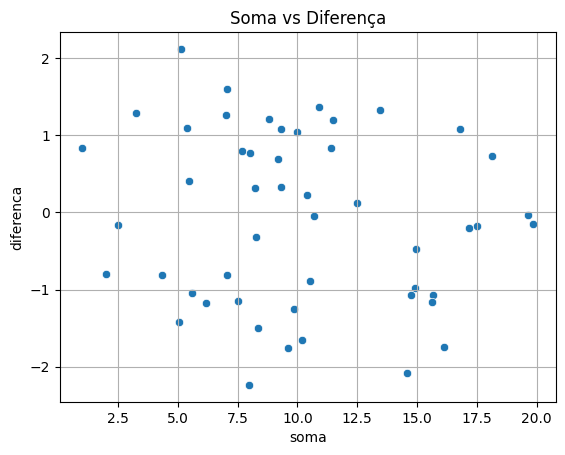

In [6]:
# Nova matriz de transformação: soma e diferença
B = np.array([[1, 1],
              [1, -1]])

transformado2 = B @ notas

df_transformado2 = pd.DataFrame({
    'soma': transformado2[0],
    'diferenca': transformado2[1]
})

sns.scatterplot(data=df_transformado2, x='soma', y='diferenca')
plt.title('Soma vs Diferença')
plt.grid(True)
plt.show()


No gráfico da soma e diferença, os pontos ficaram mais espalhados. Isso mostra que, com a transformação, conseguimos separar melhor os dados e tirar um pouco da dependência entre eles. A soma mostra o quanto os alunos foram bem no geral, enquanto a diferença mostra a distância entre as notas das duas provas. Visualmente, dá pra perceber que agora cada eixo representa um tipo diferente de informação.